# **Model Training**

## **Data Preprocessing**

In [25]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt

In [26]:
# reading data
main_df = pd.read_csv('data.csv')
main_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [27]:
main_df.shape

(381109, 12)

In [28]:
# taking 20% of data for experimentation
df = main_df.iloc[:int(0.2*main_df.shape[0])]

In [29]:
# shape of experimentation data 
df.shape

(76221, 12)

In [30]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76221 entries, 0 to 76220
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    76221 non-null  int64  
 1   Gender                76221 non-null  object 
 2   Age                   76221 non-null  int64  
 3   Driving_License       76221 non-null  int64  
 4   Region_Code           76221 non-null  float64
 5   Previously_Insured    76221 non-null  int64  
 6   Vehicle_Age           76221 non-null  object 
 7   Vehicle_Damage        76221 non-null  object 
 8   Annual_Premium        76221 non-null  float64
 9   Policy_Sales_Channel  76221 non-null  float64
 10  Vintage               76221 non-null  int64  
 11  Response              76221 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 7.0+ MB


In [31]:
# removing unwanted columns
columns_to_remove = ['id', 'Driving_License']
df.drop(columns=columns_to_remove, inplace=True)

C:\Users\masan\AppData\Local\Temp\ipykernel_9368\3260067649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, inplace=True)


In [32]:
# unique values in region code
print("There are", df['Region_Code'].nunique(), "unique values of region code")

There are 53 unique values of region code


In [33]:
# reducing categories in region code column 
region_counts = df['Region_Code'].value_counts()
df['Region_Code'] = [i if region_counts[i] >= 6280 else 1.0 for i in df['Region_Code']]

C:\Users\masan\AppData\Local\Temp\ipykernel_9368\1944345735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region_Code'] = [i if region_counts[i] >= 6280 else 1.0 for i in df['Region_Code']]


In [34]:
# checkin unique values in Region_Code column
df['Region_Code'].unique()

array([28.,  1.,  8.])

In [35]:
# changing datatype to str
df['Region_Code'] = df['Region_Code'].astype(str)

C:\Users\masan\AppData\Local\Temp\ipykernel_9368\278871356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region_Code'] = df['Region_Code'].astype(str)


In [36]:
# reducing categories in region code column
policy_sales_channel_count = df['Policy_Sales_Channel'].value_counts()
df['Policy_Sales_Channel'] = [i if policy_sales_channel_count[i] >= 1360 else 1.0 for i in df['Policy_Sales_Channel']]

C:\Users\masan\AppData\Local\Temp\ipykernel_9368\996567190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Policy_Sales_Channel'] = [i if policy_sales_channel_count[i] >= 1360 else 1.0 for i in df['Policy_Sales_Channel']]


In [37]:
# checking unique values in Policy_Sales_Channel column
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,   1., 156., 122.])

In [38]:
# changing datatype to str
df['Policy_Sales_Channel'] =df['Policy_Sales_Channel'].astype(str)

C:\Users\masan\AppData\Local\Temp\ipykernel_9368\3747202185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Policy_Sales_Channel'] =df['Policy_Sales_Channel'].astype(str)


In [39]:
# head of dataset
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1.0,1,< 1 Year,No,27496.0,152.0,39,0


In [40]:
# splitting data into X and y
X = df.drop(columns='Response')
y = df['Response']

In [41]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [42]:
# grouping columns
columns_to_label_encode = ['Gender', 'Vehicle_Damage']
columns_to_onehot_encode = ['Region_Code', 'Policy_Sales_Channel']
columns_to_scale = ['Age', 'Vintage']

In [43]:
# Define a function for label encoding
def label_encode_columns(X):
    for col in columns_to_label_encode:
        X[col] = LabelEncoder().fit_transform(X[col])
    return X

# defining function for label encoding for vehicle age
def mapping(X):
    X['Vehicle_Age'] = X['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype(int)
    return X

In [44]:
# defining column transformer for performing operations on columns 
preprocessor = ColumnTransformer(
    [
        ('Label_encoding', FunctionTransformer(label_encode_columns, validate=False), columns_to_label_encode),
        ('Label_encoding_for_vehicle_age', FunctionTransformer(mapping, validate=False), ['Vehicle_Age']),
        ('Onehot_encoding', OneHotEncoder(), columns_to_onehot_encode),
        ('min_max_scaling', StandardScaler(), columns_to_scale)
    ]
)

In [45]:
# applying preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [46]:
# random under sampling for balancing dataset

random_under_sampler = RandomUnderSampler()
X_resampled, y_resampled = random_under_sampler.fit_resample(X_train, y_train)

# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [47]:
# importing all ml models for classifications
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Logistic Regressor
Accuracy is:  0.68
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     10053
           1       0.26      0.91      0.41      1381

    accuracy                           0.68     11434
   macro avg       0.62      0.78      0.59     11434
weighted avg       0.89      0.68      0.74     11434



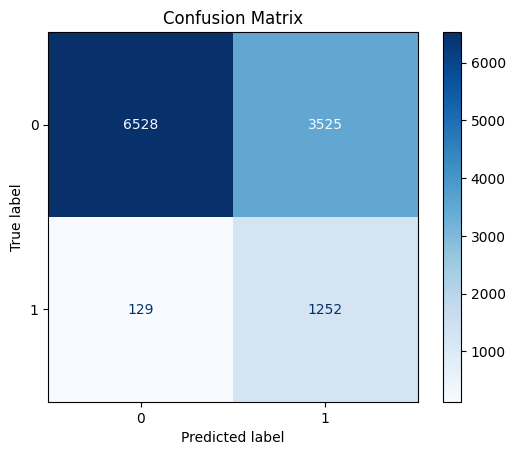

Knearest Neighbour Classifier
Accuracy is:  0.7
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     10053
           1       0.27      0.83      0.40      1381

    accuracy                           0.70     11434
   macro avg       0.62      0.76      0.60     11434
weighted avg       0.88      0.70      0.75     11434



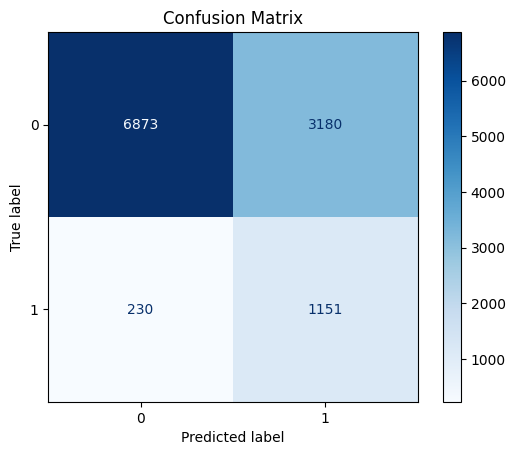

Decision Tree Classifier
Accuracy is:  0.71
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     10053
           1       0.25      0.71      0.37      1381

    accuracy                           0.71     11434
   macro avg       0.60      0.71      0.59     11434
weighted avg       0.86      0.71      0.76     11434



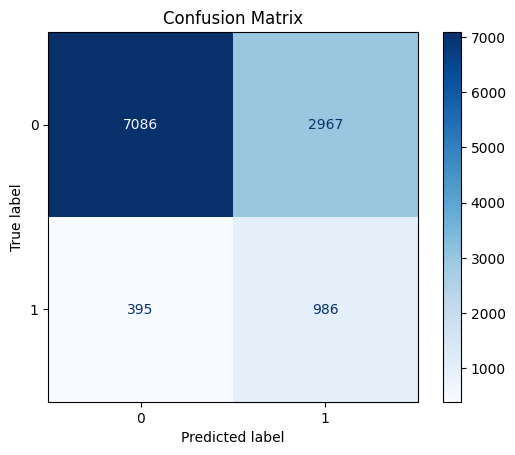

Random Forest Classifier
Accuracy is:  0.7
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     10053
           1       0.26      0.80      0.40      1381

    accuracy                           0.70     11434
   macro avg       0.61      0.75      0.60     11434
weighted avg       0.88      0.70      0.75     11434



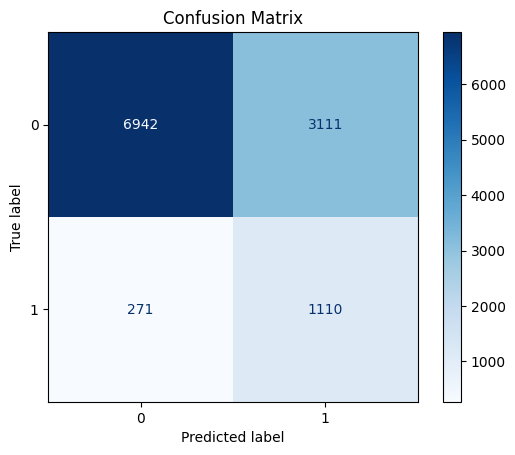

Gradient Boosting Classifier
Accuracy is:  0.69
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.66      0.79     10053
           1       0.27      0.91      0.42      1381

    accuracy                           0.69     11434
   macro avg       0.63      0.79      0.60     11434
weighted avg       0.90      0.69      0.75     11434



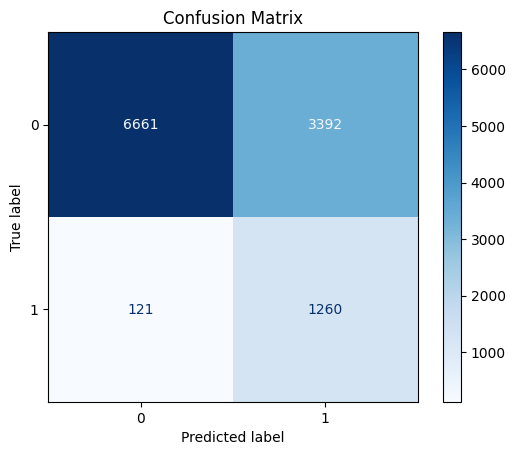

Adaboost Classifier
Accuracy is:  0.68
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     10053
           1       0.27      0.91      0.41      1381

    accuracy                           0.68     11434
   macro avg       0.62      0.78      0.60     11434
weighted avg       0.90      0.68      0.74     11434



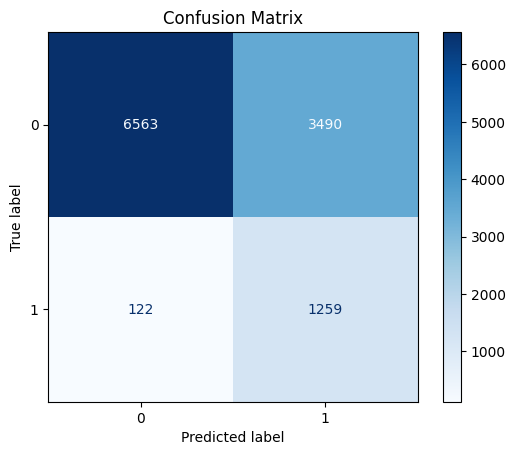

xgb Classifier
Accuracy is:  0.7
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     10053
           1       0.27      0.89      0.42      1381

    accuracy                           0.70     11434
   macro avg       0.62      0.78      0.61     11434
weighted avg       0.89      0.70      0.75     11434



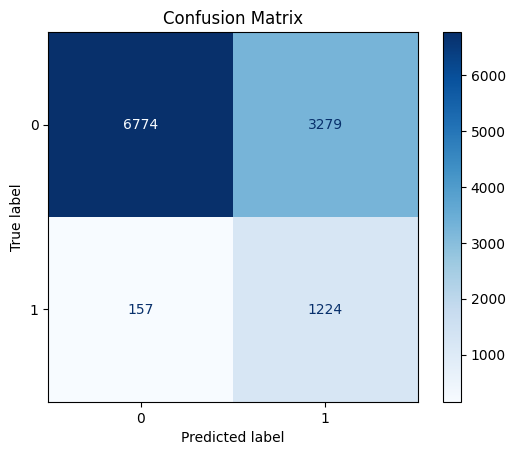

Learning rate set to 0.03375
0:	learn: 0.6724835	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6535999	total: 20.4ms	remaining: 10.2s
2:	learn: 0.6367530	total: 29ms	remaining: 9.63s
3:	learn: 0.6211081	total: 37.7ms	remaining: 9.38s
4:	learn: 0.6074400	total: 45.9ms	remaining: 9.14s
5:	learn: 0.5942088	total: 54.8ms	remaining: 9.07s
6:	learn: 0.5827830	total: 63.4ms	remaining: 8.99s
7:	learn: 0.5716237	total: 72.3ms	remaining: 8.97s
8:	learn: 0.5614284	total: 80.7ms	remaining: 8.89s
9:	learn: 0.5519192	total: 89.6ms	remaining: 8.87s
10:	learn: 0.5434798	total: 98.5ms	remaining: 8.85s
11:	learn: 0.5356126	total: 107ms	remaining: 8.83s
12:	learn: 0.5287347	total: 116ms	remaining: 8.81s
13:	learn: 0.5231759	total: 122ms	remaining: 8.62s
14:	learn: 0.5173392	total: 131ms	remaining: 8.59s
15:	learn: 0.5122444	total: 139ms	remaining: 8.55s
16:	learn: 0.5076688	total: 147ms	remaining: 8.48s
17:	learn: 0.5034070	total: 155ms	remaining: 8.48s
18:	learn: 0.4991866	total: 164ms	remaining: 8.48s
19:

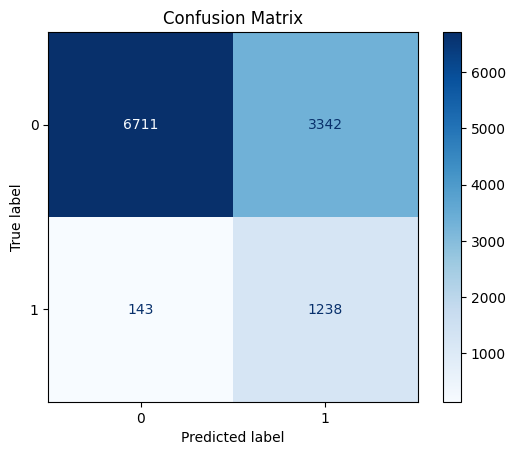

In [48]:
# experimenting with all models
models = {
    'Logistic Regressor': LogisticRegression(),
    'Knearest Neighbour Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    # 'Support Vector Classifier':SVC(),
    'Adaboost Classifier': AdaBoostClassifier(),
    'xgb Classifier': XGBClassifier(),
    'catboost Classifier': CatBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)

    print(list(models.keys())[i])
    print("Accuracy is: ", round(accuracy_score(y_test, y_pred), 2))
    print("Classification report is as fallow: \n", classification_report(y_test, y_pred))

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')  # Use a colormap for better visualization
    plt.title("Confusion Matrix")
    plt.show()
    print('='*100)